### Zadanie

- Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (LinearAlgebra.dot) i mnożenia macierzy kwadratowej przez wektor z użyciem operatora *.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów. Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny być zapisywane do jednego pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do jednego DataFrame w języku Julia.
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego.
- Proszę poukładac wykresy w tabelkę za pomocą opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.



In [1]:
using Pkg
Pkg.add("DataFrames")

    Updating registry at `C:\Users\niczk\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\niczk\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\niczk\.julia\environments\v1.7\Manifest.toml`


In [2]:
Pkg.add("Statistics")

   Resolving package versions...
  No Changes to `C:\Users\niczk\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\niczk\.julia\environments\v1.7\Manifest.toml`


In [3]:
Pkg.add("LinearAlgebra")

   Resolving package versions...
  No Changes to `C:\Users\niczk\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\niczk\.julia\environments\v1.7\Manifest.toml`


In [4]:
Pkg.add("CSV")

   Resolving package versions...
  No Changes to `C:\Users\niczk\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\niczk\.julia\environments\v1.7\Manifest.toml`


In [5]:
using LinearAlgebra
# generowanie wektorów
number = Int64[]
sizes = Int64[]
vectors1 = Vector{Int64}[]
vectors2 = Vector{Int64}[]
types = String[]
r = [10, 100, 1000, 5000, 10000, 25000, 40000, 50000, 60000, 75000, 100000, 250000, 400000, 500000, 600000, 750000, 1000000]
for i = r
    vec = rand(1:1000, i)
    k = 1:10
    for j = k
        push!(vectors1, vec)
        push!(vectors2, vec)
        push!(sizes, i)
        push!(types, "vector")
        push!(number, j)
    end
end

In [6]:
# generowanie macierzy kwadratowych
matrixes = Matrix{Int64}[]
r = [10, 100, 250, 500, 750, 1000, 2500, 4000, 5000, 6000, 7500, 8000, 10000]
for i = r
    vec = rand(1:10000, i)
    mat = rand(1:10000, (i, i))
    k = 1:10
    for j = k
        push!(vectors1, vec)
        push!(matrixes, mat)
        push!(sizes, i)
        push!(types, "matrix")
        push!(number, j)
    end
end

In [7]:
# skompilowanie po jednym działaniu żeby nie zaburzać wyników pomiarów
dot(vectors1[1], vectors2[1])
matrixes[1]*vectors1[1]

10-element Vector{Int64}:
 12766409
 21302212
 19775648
 14092755
 14769288
 13322322
 24577565
 18913358
 13851952
 15818605

In [8]:
# pomiary
times = Float64[]
r = 1:length(sizes)
s = -1
for i = r
    if types[i] == "vector"
        s = i
        time = @elapsed dot(vectors1[i], vectors2[i]) 
        push!(times, time)
    else    
        time = @elapsed matrixes[i-s]*vectors1[i]
        push!(times, time)
    end  
end

In [9]:
# zebranie wszystkich danych
using DataFrames
df1 = DataFrame(vector_size=sizes, 
    measure=number,
    second_object=types, 
    time=times)

,vector_size,measure,second_object,time
,Int64,Int64,String,Float64
1,10,1,vector,3.1e-6
2,10,2,vector,2.1e-6
3,10,3,vector,1.0e-7
4,10,4,vector,1.0e-7
5,10,5,vector,1.0e-7
6,10,6,vector,1.0e-7
7,10,7,vector,1.0e-7
8,10,8,vector,1.0e-7
9,10,9,vector,2.0e-7


In [10]:
# zapisanie do pliku CSV
using CSV
CSV.write("mydataframe1.csv", df1)

"mydataframe1.csv"

In [11]:
# odczytanie z pliku CSV
df=CSV.read("mydataframe1.csv", delim=",",DataFrame)

,vector_size,measure,second_object,time
,Int64,Int64,String7,Float64
1,10,1,vector,3.1e-6
2,10,2,vector,2.1e-6
3,10,3,vector,1.0e-7
4,10,4,vector,1.0e-7
5,10,5,vector,1.0e-7
6,10,6,vector,1.0e-7
7,10,7,vector,1.0e-7
8,10,8,vector,1.0e-7
9,10,9,vector,2.0e-7


In [12]:
# pogrupowanie ze względu na długość wektora i działanie
grouped_df = groupby(df, [:vector_size, :second_object])

,vector_size,measure,second_object,time
,Int64,Int64,String7,Float64
1,10,1,vector,3.1e-6
2,10,2,vector,2.1e-6
3,10,3,vector,1.0e-7
4,10,4,vector,1.0e-7
5,10,5,vector,1.0e-7
6,10,6,vector,1.0e-7
7,10,7,vector,1.0e-7
8,10,8,vector,1.0e-7
9,10,9,vector,2.0e-7


In [13]:
# wylicznie średnich i odchyleń standardowych dla każdego zestawu pomiarów
using Statistics
stats = combine(grouped_df, "time" => mean, "time" => std)

,vector_size,second_object,time_mean,time_std
,Int64,String7,Float64,Float64
1,10,vector,6.1e-7,1.07543e-6
2,100,vector,3.7e-7,7.49889e-7
3,1000,vector,7.1e-7,1.44914e-7
4,5000,vector,3.26e-6,1.03516e-6
5,10000,vector,1.295e-5,1.17042e-5
6,25000,vector,1.742e-5,6.5821e-6
7,40000,vector,2.47e-5,6.28985e-6
8,50000,vector,3.104e-5,8.20802e-6
9,60000,vector,3.723e-5,9.9684e-6


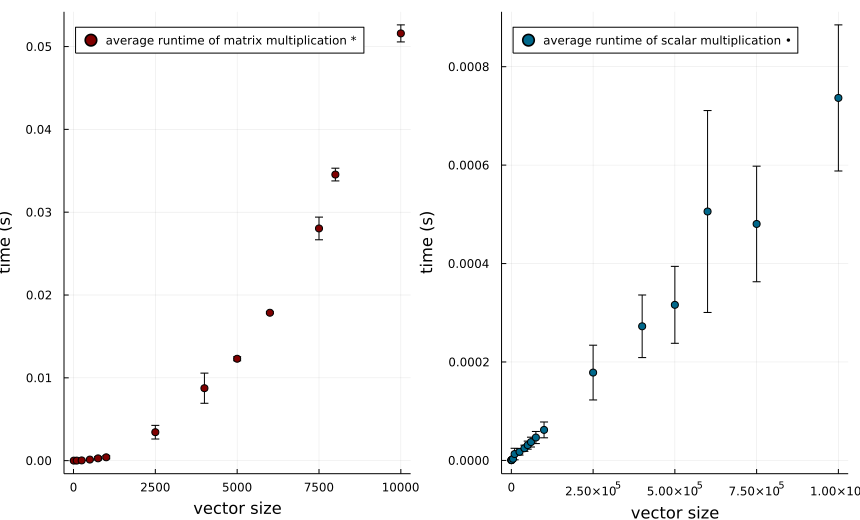

In [28]:
# wykres
using Plots
 scatter(stats.vector_size, stats.time_mean, group=stats.second_object, 
    label = ["average runtime of matrix multiplication *" "average runtime of scalar multiplication •"], 
    colour = [:maroon :deepskyblue4], 
    layout=2, 
    yerr=stats.time_std, 
    xlabel="vector size", ylabel="time (s)", size=(860, 520), legend=:topleft)